#Assignment 3.2: LSTM ASSIGNMENT

This assignment is aimed at implementing LSTMs that we had learnt in class. In this task, we'll implement a model that takes text data as input and returns the emotion behind the text.

## TEXT PRE-PROCESSING FOR NLP

In [3]:
import pandas as pd
df = pd.read_csv('/content/new_dataset.csv')
df

,sentiment,text
0,Negative,@xnausikaax oh no! where did u order from? tha...
1,Negative,A great hard training weekend is over. a coup...
2,Negative,"Right, off to work Only 5 hours to go until I..."
3,Negative,I am craving for japanese food
4,Negative,Jean Michel Jarre concert tomorrow gotta work...
...,...,...
9995,Positive,@krystynchong Love to see that!
9996,Positive,Lovely day spent with the misses. Just loverly
9997,Positive,@jason_mraz i love the fact that people are es...
9998,Positive,time to shower and tidy then going to go out f...


In [4]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
def stopremover(text):

  words = text.split()
  filtered_words = []

  for word in words:
      if word.lower() not in stop_words:
          filtered_words.append(word)

  good_text = ' '.join(filtered_words)
  return good_text

df['text'] = df['text'].apply(stopremover)

df

,sentiment,text
0,Negative,@xnausikaax oh no! u order from? that's horrible
1,Negative,great hard training weekend over. couple days ...
2,Negative,"Right, work 5 hours go free xD"
3,Negative,craving japanese food
4,Negative,Jean Michel Jarre concert tomorrow gotta work ...
...,...,...
9995,Positive,@krystynchong Love see that!
9996,Positive,Lovely day spent misses. loverly
9997,Positive,@jason_mraz love fact people essentially good ...
9998,Positive,time shower tidy going go lunch friend lake si...


In [6]:
def remove_handles(text):
    words = text.split()
    cleaned_words = []

    for word in words:
        if not word.startswith('@'):
            cleaned_words.append(word)

    return ' '.join(cleaned_words)

df['text'] = df['text'].apply(remove_handles)

df

,sentiment,text
0,Negative,oh no! u order from? that's horrible
1,Negative,great hard training weekend over. couple days ...
2,Negative,"Right, work 5 hours go free xD"
3,Negative,craving japanese food
4,Negative,Jean Michel Jarre concert tomorrow gotta work ...
...,...,...
9995,Positive,Love see that!
9996,Positive,Lovely day spent misses. loverly
9997,Positive,love fact people essentially good may wrong haha
9998,Positive,time shower tidy going go lunch friend lake si...


In [7]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

def stem_text(text):
    words = text.split()
    stemmed_words = []

    for word in words:
        stemmed_word = stemmer.stem(word)
        stemmed_words.append(stemmed_word)

    return ' '.join(stemmed_words)

df['text'] = df['text'].apply(stem_text)

df

,sentiment,text
0,Negative,oh no! u order from? that' horribl
1,Negative,great hard train weekend over. coupl day rest ...
2,Negative,"right, work 5 hour go free xd"
3,Negative,crave japanes food
4,Negative,jean michel jarr concert tomorrow gotta work 7...
...,...,...
9995,Positive,love see that!
9996,Positive,love day spent misses. loverli
9997,Positive,love fact peopl essenti good may wrong haha
9998,Positive,time shower tidi go go lunch friend lake side ...


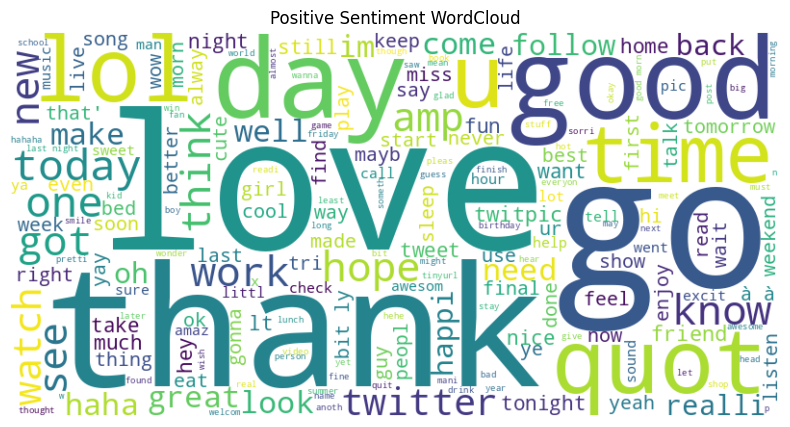

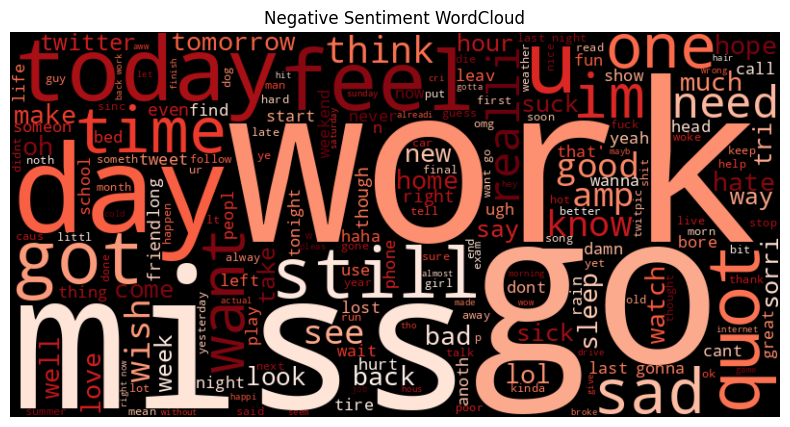

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_text = ' '.join(df[df['sentiment'] == 'Positive']['text'])
negative_text = ' '.join(df[df['sentiment'] == 'Negative']['text'])

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment WordCloud')
plt.show()

wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment WordCloud')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

x = df['text']
y = df['sentiment']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(oov_token='<OOV>')

tokenizer.fit_on_texts(x_train)

word_index = tokenizer.word_index

vocab_size = len(tokenizer.word_index)
print("Vocab size:", vocab_size)

Vocab size: 11793


In [11]:
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = max(len(seq) for seq in x_train_seq)

x_train_pad = pad_sequences(x_train_seq, maxlen=max_length, padding='post', truncating='post')
x_test_pad = pad_sequences(x_test_seq, maxlen=max_length, padding='post', truncating='post')

print("Padded training shape:", x_train_pad.shape)
print("Padded test shape:", x_test_pad.shape)

Padded training shape: (8000, 30)
Padded test shape: (2000, 30)


In [13]:
y_train= y_train.map({'Negative': 0, 'Positive': 1})
y_test= y_test.map({'Negative': 0, 'Positive': 1})
y_test

,sentiment
2919,0
5911,1
1631,0
9536,1
3486,0
...,...
5598,1
3354,0
9744,1
9566,1


In [14]:
import tensorflow as tf
import numpy as np
!wget --no-check-certificate http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2025-06-16 14:25:23--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-06-16 14:25:23--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-06-16 14:25:23--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
  Issued certificate has expired.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zi

In [18]:
GLOVE_EMB = './glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = './best_model.hdf5'
embeddings_index = {}
with open(GLOVE_EMB, encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
print('Found %s word vectors.' % len(embeddings_index))
embedding_matrix = np.zeros((vocab_size + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    if i > vocab_size:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
embedding_layer = tf.keras.layers.Embedding(
    input_dim=vocab_size + 1,
    output_dim=EMBEDDING_DIM,
    weights=[embedding_matrix],
    trainable=False
)

Found 400000 word vectors.


![Sequence Model](https://miro.medium.com/max/1458/1*SICYykT7ybua1gVJDNlajw.png)

In [34]:
from tensorflow.keras.layers import (
    Conv1D, Bidirectional, LSTM, Dense, Input, Dropout,
    SpatialDropout1D, GlobalMaxPooling1D, Embedding
)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.regularizers import l2
sequence_input = Input(shape=(max_length,), dtype='int32')
embedding_layer.trainable = True
x = embedding_layer(sequence_input)

x = SpatialDropout1D(0.4)(x)
x = Bidirectional(LSTM(64, return_sequences=True, dropout=0.3, recurrent_dropout=0.3))(x)
x = Conv1D(64, kernel_size=3, activation='relu', padding='valid')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(64, activation='relu', kernel_regularizer=l2(1e-4))(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu', kernel_regularizer=l2(1e-4))(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=sequence_input, outputs=output)
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_2 (Embedding)         │ (None, 30, 300)        │     3,538,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_4             │ (None, 30, 300)        │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 30, 128)        │       186,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 28, 64)         │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_2          │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,755,993 (14.33 MB)

 Trainable params: 3,755,993 (14.33 MB)

 Non-trainable params: 0 (0.00 B)

**Train the model on the train split, and validate it on the test split.**

In [38]:
checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max'
)

earlystop = EarlyStopping(
    monitor='val_accuracy',
    patience=4,
    restore_best_weights=True,
    verbose=1
)


history = model.fit(
    x_train_pad,
    y_train,
    epochs=42,
    batch_size=512,
    validation_data=(x_test_pad, y_test),
    callbacks=[checkpoint, earlystop],
    verbose=1
)

Epoch 1/42
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - accuracy: 0.5112 - loss: 0.7140
Epoch 1: val_accuracy improved from -inf to 0.52050, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 363ms/step - accuracy: 0.5110 - loss: 0.7140 - val_accuracy: 0.5205 - val_loss: 0.7028
Epoch 2/42
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.5016 - loss: 0.7109
Epoch 2: val_accuracy improved from 0.52050 to 0.53600, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 222ms/step - accuracy: 0.5014 - loss: 0.7109 - val_accuracy: 0.5360 - val_loss: 0.7018
Epoch 3/42
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.4900 - loss: 0.7099
Epoch 3: val_accuracy improved from 0.53600 to 0.55850, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 222ms/step - accuracy: 0.4902 - loss: 0.7099 - val_accuracy: 0.5585 - val_loss: 0.7012
Epoch 4/42
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.5082 - loss: 0.7060
Epoch 4: val_accuracy improved from 0.55850 to 0.56800, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 316ms/step - accuracy: 0.5083 - loss: 0.7059 - val_accuracy: 0.5680 - val_loss: 0.7008
Epoch 5/42
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.5178 - loss: 0.7049
Epoch 5: val_accuracy improved from 0.56800 to 0.57150, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - accuracy: 0.5178 - loss: 0.7049 - val_accuracy: 0.5715 - val_loss: 0.7003
Epoch 6/42
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.5031 - loss: 0.7056
Epoch 6: val_accuracy did not improve from 0.57150
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 203ms/step - accuracy: 0.5030 - loss: 0.7057 - val_accuracy: 0.5625 - val_loss: 0.6999
Epoch 7/42
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.5144 - loss: 0.7050
Epoch 7: val_accuracy did not improve from 0.57150
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 212ms/step - accuracy: 0.5146 - loss: 0.7049 - val_accuracy: 0.5710 - val_loss: 0.6994
Epoch 8/42
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.5193 - loss: 0.7041
Epoch 8: val_accuracy did not improve from 0.57150
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 224ms/step - accuracy: 0.5192 - loss: 0.7041 - val_accuracy: 0.5695 - val_loss: 0.6986
Epoch 9/42
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.5147 - loss: 0.7017
Epoch 9: val_accuracy improved from

16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 217ms/step - accuracy: 0.5152 - loss: 0.7016 - val_accuracy: 0.5765 - val_loss: 0.6978
Epoch 10/42
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.5148 - loss: 0.7015
Epoch 10: val_accuracy improved from 0.57650 to 0.58300, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 317ms/step - accuracy: 0.5152 - loss: 0.7015 - val_accuracy: 0.5830 - val_loss: 0.6969
Epoch 11/42
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.5341 - loss: 0.6981
Epoch 11: val_accuracy improved from 0.58300 to 0.58450, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 204ms/step - accuracy: 0.5339 - loss: 0.6982 - val_accuracy: 0.5845 - val_loss: 0.6954
Epoch 12/42
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.5396 - loss: 0.6986
Epoch 12: val_accuracy improved from 0.58450 to 0.59100, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 210ms/step - accuracy: 0.5396 - loss: 0.6986 - val_accuracy: 0.5910 - val_loss: 0.6937
Epoch 13/42
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 0.5497 - loss: 0.6978
Epoch 13: val_accuracy did not improve from 0.59100
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 265ms/step - accuracy: 0.5500 - loss: 0.6977 - val_accuracy: 0.5895 - val_loss: 0.6917
Epoch 14/42
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.5490 - loss: 0.6983
Epoch 14: val_accuracy improved from 0.59100 to 0.61050, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - accuracy: 0.5489 - loss: 0.6982 - val_accuracy: 0.6105 - val_loss: 0.6892
Epoch 15/42
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - accuracy: 0.5508 - loss: 0.6955
Epoch 15: val_accuracy improved from 0.61050 to 0.61850, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 280ms/step - accuracy: 0.5514 - loss: 0.6954 - val_accuracy: 0.6185 - val_loss: 0.6860
Epoch 16/42
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.5585 - loss: 0.6953
Epoch 16: val_accuracy improved from 0.61850 to 0.62000, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 232ms/step - accuracy: 0.5586 - loss: 0.6951 - val_accuracy: 0.6200 - val_loss: 0.6826
Epoch 17/42
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.5731 - loss: 0.6879
Epoch 17: val_accuracy improved from 0.62000 to 0.63500, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 236ms/step - accuracy: 0.5730 - loss: 0.6880 - val_accuracy: 0.6350 - val_loss: 0.6776
Epoch 18/42
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.5791 - loss: 0.6881
Epoch 18: val_accuracy improved from 0.63500 to 0.64600, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 308ms/step - accuracy: 0.5788 - loss: 0.6881 - val_accuracy: 0.6460 - val_loss: 0.6723
Epoch 19/42
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.6072 - loss: 0.6762
Epoch 19: val_accuracy improved from 0.64600 to 0.64800, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - accuracy: 0.6069 - loss: 0.6763 - val_accuracy: 0.6480 - val_loss: 0.6661
Epoch 20/42
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.6061 - loss: 0.6740
Epoch 20: val_accuracy improved from 0.64800 to 0.65700, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step - accuracy: 0.6063 - loss: 0.6740 - val_accuracy: 0.6570 - val_loss: 0.6571
Epoch 21/42
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.6110 - loss: 0.6705
Epoch 21: val_accuracy improved from 0.65700 to 0.66300, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 310ms/step - accuracy: 0.6110 - loss: 0.6704 - val_accuracy: 0.6630 - val_loss: 0.6496
Epoch 22/42
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.6207 - loss: 0.6654
Epoch 22: val_accuracy improved from 0.66300 to 0.67200, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 209ms/step - accuracy: 0.6208 - loss: 0.6654 - val_accuracy: 0.6720 - val_loss: 0.6409
Epoch 23/42
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.6287 - loss: 0.6609
Epoch 23: val_accuracy improved from 0.67200 to 0.67550, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 221ms/step - accuracy: 0.6288 - loss: 0.6609 - val_accuracy: 0.6755 - val_loss: 0.6333
Epoch 24/42
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.6346 - loss: 0.6566
Epoch 24: val_accuracy improved from 0.67550 to 0.68250, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 230ms/step - accuracy: 0.6346 - loss: 0.6567 - val_accuracy: 0.6825 - val_loss: 0.6264
Epoch 25/42
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.6445 - loss: 0.6512
Epoch 25: val_accuracy did not improve from 0.68250
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 205ms/step - accuracy: 0.6449 - loss: 0.6510 - val_accuracy: 0.6810 - val_loss: 0.6196
Epoch 26/42
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.6555 - loss: 0.6383
Epoch 26: val_accuracy improved from 0.68250 to 0.68600, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 258ms/step - accuracy: 0.6559 - loss: 0.6382 - val_accuracy: 0.6860 - val_loss: 0.6124
Epoch 27/42
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.6632 - loss: 0.6328
Epoch 27: val_accuracy improved from 0.68600 to 0.69500, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 206ms/step - accuracy: 0.6633 - loss: 0.6329 - val_accuracy: 0.6950 - val_loss: 0.6066
Epoch 28/42
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.6719 - loss: 0.6277
Epoch 28: val_accuracy did not improve from 0.69500
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step - accuracy: 0.6722 - loss: 0.6277 - val_accuracy: 0.6905 - val_loss: 0.6037
Epoch 29/42
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.6818 - loss: 0.6243
Epoch 29: val_accuracy improved from 0.69500 to 0.69750, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 320ms/step - accuracy: 0.6817 - loss: 0.6242 - val_accuracy: 0.6975 - val_loss: 0.5979
Epoch 30/42
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.6919 - loss: 0.6114
Epoch 30: val_accuracy improved from 0.69750 to 0.70150, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 206ms/step - accuracy: 0.6918 - loss: 0.6112 - val_accuracy: 0.7015 - val_loss: 0.5929
Epoch 31/42
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.6950 - loss: 0.6101
Epoch 31: val_accuracy did not improve from 0.70150
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 208ms/step - accuracy: 0.6949 - loss: 0.6101 - val_accuracy: 0.7010 - val_loss: 0.5898
Epoch 32/42
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.7002 - loss: 0.6013
Epoch 32: val_accuracy did not improve from 0.70150
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 235ms/step - accuracy: 0.7000 - loss: 0.6014 - val_accuracy: 0.6990 - val_loss: 0.5862
Epoch 33/42
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.7182 - loss: 0.5887
Epoch 33: val_accuracy improved from 0.70150 to 0.70300, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 215ms/step - accuracy: 0.7177 - loss: 0.5890 - val_accuracy: 0.7030 - val_loss: 0.5807
Epoch 34/42
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.7109 - loss: 0.5952
Epoch 34: val_accuracy improved from 0.70300 to 0.70600, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 323ms/step - accuracy: 0.7107 - loss: 0.5952 - val_accuracy: 0.7060 - val_loss: 0.5802
Epoch 35/42
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.7111 - loss: 0.5850
Epoch 35: val_accuracy did not improve from 0.70600
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 205ms/step - accuracy: 0.7109 - loss: 0.5853 - val_accuracy: 0.7050 - val_loss: 0.5757
Epoch 36/42
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.7240 - loss: 0.5771
Epoch 36: val_accuracy improved from 0.70600 to 0.71000, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - accuracy: 0.7235 - loss: 0.5775 - val_accuracy: 0.7100 - val_loss: 0.5726
Epoch 37/42
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.7152 - loss: 0.5834
Epoch 37: val_accuracy did not improve from 0.71000
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 259ms/step - accuracy: 0.7155 - loss: 0.5833 - val_accuracy: 0.7075 - val_loss: 0.5713
Epoch 38/42
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.7267 - loss: 0.5768
Epoch 38: val_accuracy did not improve from 0.71000
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 202ms/step - accuracy: 0.7266 - loss: 0.5764 - val_accuracy: 0.7075 - val_loss: 0.5681
Epoch 39/42
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.7302 - loss: 0.5704
Epoch 39: val_accuracy did not improve from 0.71000
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 211ms/step - accuracy: 0.7302 - loss: 0.5704 - val_accuracy: 0.7080 - val_loss: 0.5660
Epoch 40/42
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.7331 - loss: 0.5597
Epoch 40: val_accuracy did n

In [48]:
import random

i = random.randint(0, len(x_test) - 1)

text = x_test.iloc[i]
padded_input = x_test_pad[i].reshape(1, -1)

prediction = model.predict(padded_input)[0][0]
sentiment = "Positive" if prediction >= 0.5 else "Negative"

print("Text:")
print(text)

print(f"\nPredicted Sentiment: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Text:
wew today super crazi lol

Predicted Sentiment: Positive


In [49]:
input_str = "I hate everyone on earth!"

seq = tokenizer.texts_to_sequences([input_str])
padded_seq = pad_sequences(seq, maxlen=max_length)

prediction = model.predict(padded_seq)[0][0]
sentiment = "Positive" if prediction >= 0.5 else "Negative"

print("Input String:")
print(input_str)

print(f"\nPredicted Sentiment: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Input String:
I hate everyone on earth!

Predicted Sentiment: Negative
